## Youtube Videos Classification using NLP

In [ ]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Uploading the csv file to colab
from google.colab import files
uploaded = files.upload()

Saving youtube.csv to youtube.csv


In [ ]:
# Data simport and sample
data = pd.read_csv("youtube.csv")
data.head()

,link,title,description,category
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel


In [ ]:
len(data)

3599

In [ ]:
# Understanding the column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   link         3599 non-null   object
 1   title        3599 non-null   object
 2   description  3599 non-null   object
 3   category     3599 non-null   object
dtypes: object(4)
memory usage: 112.6+ KB


In [ ]:
# Identifying columns with Null values (if any)
data.isnull().sum()

link           0
title          0
description    0
category       0
dtype: int64

In [ ]:
# Checking the catergories in the data set
data['category'].unique()

array(['travel', 'food', 'art_music', 'history'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


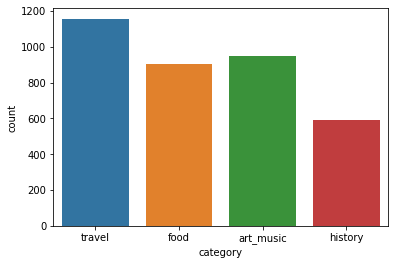

In [ ]:
# Understanding the distribution of the catergory variable
sns.countplot(data['category'])
plt.show()

In [ ]:
# Importing string library
import string
punct=string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Creating a function to remove punctuations
def remove_punct(text):
    text_nonpunct=''.join([char for char in text if char not in punct])
    return text_nonpunct

In [ ]:
# Applying the remove punctuations function onto the description column 
data['text_nonpunct']=data['description'].apply(lambda x:remove_punct(x.lower()))

In [ ]:
data.head()

,link,title,description,category,text_nonpunct
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel,tanya khanijow\n671k subscribers\nsubscribe\nt...
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel,priscilla lee\n456k subscribers\nsubscribe\ndi...
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel,allison anderson\n588k subscribers\nsubscribe\...
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel,yes theory\n665m subscribers\nsubscribe\nblack...
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel,tanya khanijow\n671k subscribers\nsubscribe\nh...


In [ ]:
# Importing the word tokenizer
from nltk.tokenize import word_tokenize
def tokenize(text):
    tokens=word_tokenize(text)
    return tokens

In [ ]:
# Applying the tokenizer function
data['text_tokenize']=data['text_nonpunct'].apply(lambda x:tokenize(x))

In [ ]:
# Sample of the data after cleaning and tokenization
data.head()

,link,title,description,category,text_nonpunct,text_tokenize
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel,tanya khanijow\n671k subscribers\nsubscribe\nt...,"[tanya, khanijow, 671k, subscribers, subscribe..."
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel,priscilla lee\n456k subscribers\nsubscribe\ndi...,"[priscilla, lee, 456k, subscribers, subscribe,..."
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel,allison anderson\n588k subscribers\nsubscribe\...,"[allison, anderson, 588k, subscribers, subscri..."
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel,yes theory\n665m subscribers\nsubscribe\nblack...,"[yes, theory, 665m, subscribers, subscribe, bl..."
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel,tanya khanijow\n671k subscribers\nsubscribe\nh...,"[tanya, khanijow, 671k, subscribers, subscribe..."


In [ ]:
from nltk.corpus import stopwords
StopWords=stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    text=[word for word in text if word not in StopWords]
    return text

In [ ]:
# Removing the stop words from the tokenized data
data['text_nonStopwords']=data['text_tokenize'].apply(lambda x:remove_stopwords(x))

In [ ]:
# Texts to Sequences
from tensorflow import keras
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['text_nonStopwords'])
data['text_sequences'] = tokenizer.texts_to_sequences(data['text_nonStopwords'])

In [ ]:
# Sample of the data set after converting the texts into sequences
data.head()

,link,title,description,category,text_nonpunct,text_tokenize,text_nonStopwords,text_sequences
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel,tanya khanijow\n671k subscribers\nsubscribe\nt...,"[tanya, khanijow, 671k, subscribers, subscribe...","[tanya, khanijow, 671k, subscribers, subscribe...","[1500, 1600, 1416, 3, 1, 273, 4447, 256, 252, ..."
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel,priscilla lee\n456k subscribers\nsubscribe\ndi...,"[priscilla, lee, 456k, subscribers, subscribe,...","[priscilla, lee, 456k, subscribers, subscribe,...","[7347, 319, 2161, 3, 1, 869, 28, 1417, 2910, 6..."
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel,allison anderson\n588k subscribers\nsubscribe\...,"[allison, anderson, 588k, subscribers, subscri...","[allison, anderson, 588k, subscribers, subscri...","[5536, 2621, 5537, 3, 1, 584, 672, 225, 7349, ..."
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel,yes theory\n665m subscribers\nsubscribe\nblack...,"[yes, theory, 665m, subscribers, subscribe, bl...","[yes, theory, 665m, subscribers, subscribe, bl...","[911, 1976, 2912, 3, 1, 503, 1843, 1501, 5538,..."
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel,tanya khanijow\n671k subscribers\nsubscribe\nh...,"[tanya, khanijow, 671k, subscribers, subscribe...","[tanya, khanijow, 671k, subscribers, subscribe...","[1500, 1600, 1416, 3, 1, 19, 620, 41, 117, 444..."


In [ ]:
# Calculating the shape of the input data
input_shape=int(sum(data['text_sequences'].apply(lambda x:len(x)))/len(data['text_sequences']))

In [ ]:
# Sequence Padding
from keras.preprocessing.sequence import pad_sequences
X=pad_sequences(data['text_sequences'],maxlen=45)

In [ ]:
y=data['category']

In [ ]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
y=LB.fit_transform(y)

In [ ]:
# Test-train splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=100) # encoded_matrix
print("X_train : \n",X_train)
print("X_test  : \n",X_test)

X_train : 
 [[  884   300   438 ...  4086  4105     2]
 [    0     0     0 ...    18 15975     2]
 [    0     0     0 ...   140  9344     2]
 ...
 [   32   130    32 ...     6    59     2]
 [20983 20984    67 ...  1340     2   346]
 [    0     0     0 ...     6   179     2]]
X_test  : 
 [[    0     0     0 ...     5  1606     2]
 [    0     0     0 ...   449     3     1]
 [    0     0     0 ... 13301 13302     2]
 ...
 [    0     0     0 ...   334  1293     2]
 [    0     0     0 ... 19723 19724     2]
 [  163  9790     3 ...   230    50     2]]


In [ ]:
print("X_train shape : ",X_train.shape)
print("X_test  shape : ",X_test.shape)

X_train shape :  (2879, 45)
X_test  shape :  (720, 45)


In [ ]:
Max_words=(max(map(max, X)))+1

In [ ]:
Max_words

25232

In [ ]:
# Defining the keras sequential model
model = keras.models.Sequential([
    keras.layers.Embedding(Max_words, 64, input_shape= [input_shape]), 
    keras.layers.GRU(32),
    keras.layers.Dense(4, activation="softmax")
])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 64)            1614848   
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                                 
Total params: 1,624,388
Trainable params: 1,624,388
Non-trainable params: 0
_________________________________________________________________
None


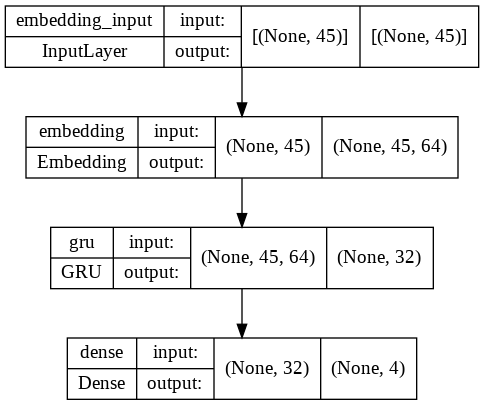

In [ ]:
# Model visualization
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

Epoch 1/25
72/72 [==============================] - 6s 45ms/step - loss: 1.2988 - accuracy: 0.3977 - val_loss: 0.9878 - val_accuracy: 0.5312
Epoch 2/25
72/72 [==============================] - 3s 38ms/step - loss: 0.6942 - accuracy: 0.6817 - val_loss: 0.4962 - val_accuracy: 0.8351
Epoch 3/25
72/72 [==============================] - 3s 38ms/step - loss: 0.2738 - accuracy: 0.9210 - val_loss: 0.3280 - val_accuracy: 0.8906
Epoch 4/25
72/72 [==============================] - 3s 37ms/step - loss: 0.0941 - accuracy: 0.9809 - val_loss: 0.3168 - val_accuracy: 0.8872
Epoch 5/25
72/72 [==============================] - 3s 38ms/step - loss: 0.0411 - accuracy: 0.9944 - val_loss: 0.3819 - val_accuracy: 0.8802
Epoch 6/25
72/72 [==============================] - 3s 38ms/step - loss: 0.0272 - accuracy: 0.9965 - val_loss: 0.3814 - val_accuracy: 0.8958
Epoch 7/25
72/72 [==============================] - 3s 38ms/step - loss: 0.0184 - accuracy: 0.9974 - val_loss: 0.3327 - val_accuracy: 0.8976
Epoch 8/25
72

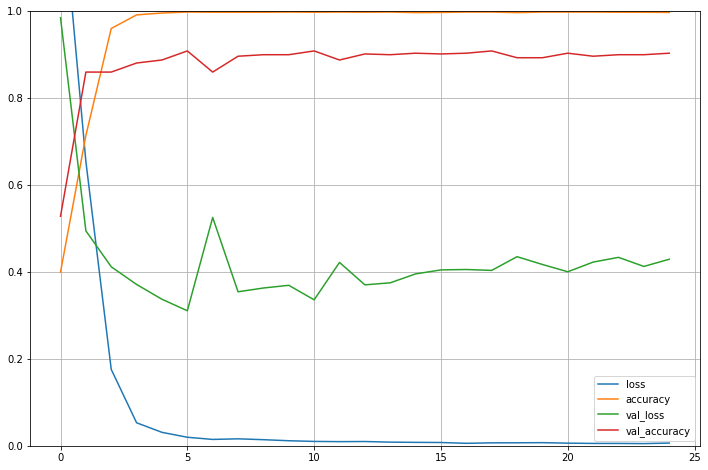

23/23 [==============================] - 1s 11ms/step - loss: 0.5543 - accuracy: 0.8708
Loss     :  0.5543165802955627
accuracy :  0.8708333373069763


In [ ]:
# plot the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

Classification report : 
               precision    recall  f1-score   support

   art_music       0.95      0.94      0.94       193
        food       0.82      0.82      0.82       170
     history       0.84      0.90      0.87       110
      travel       0.86      0.84      0.85       247

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720

Confusion matrix : 



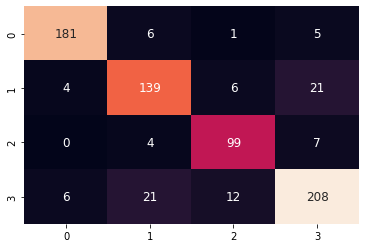

In [ ]:
y_pred = (model.predict(X_test).argmax(axis=-1)).tolist()

class_names = LB.classes_

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False)
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)